# Week 11 - excercise perceptron

## Part one - general
1. Look at the activation_function and plot the y-values for each x from -5,5 spaced with 0.5
2. Change the perceptron method from the notebook to use the numpy.dot() method in line 12 instead of the lengthy sum() function

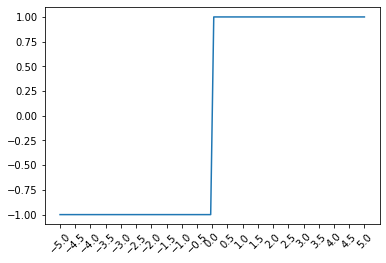

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function from Notebook 11.1
def activation_function(x):
    """
    Step function to respond with y = 1 or -1
    Parameter:
    x: An x (numeric) value that will have a corresponding y value of 1 or -1
    """
    if x < 0:
        return -1
    else:
        return 1

rnge = np.linspace(-5, 5, num=100)
val = [activation_function(i) for i in rnge]
plt.plot(rnge, val)
x = np.linspace(-5, 5, 21)
plt.xticks(x, rotation=45)
plt.show()


In [80]:
# Perceptron function from Notebook 11.1
def perceptron(inp, weights):
    """
    Given a list of input (x) values and a list of weights, 
    calculates the dot product of the 2 lists and returns 1 or -1 (fire or don't)
    Parameters:
    inp: vector of input predictors
    weights: vector of weights to be ajusted for precise prediction of output.
    """
    # This is the same as the dot product np.dot(i, w)
    dot_product = np.dot(inp, weights)
    output = activation_function(dot_product)
    return output

## Part two - rodent data

1. Make a new scatter plot with datapoints of weights vs heights. Choose different colors for rats and mice
2. Manually find the optimal linear function to divide the 2 groups (y = aX+b). Plot it on the scatter plot
3. What is the slope and intercept of the linear function?
4. Now change the 'type' column to represent rats as 1 and mice as -1
5. Clean up any rows with null data
6. Use these weights herè [40,-190] to determine if the following 3 animals are mice or rats:
    * [[231.32446731816555,26.03382997978225],
    * [17.906954059999567,6.846576762459397],
    * [230.276522831171,24.077799766119398]]
7. Find the (approximately) optimal weights using the perceptron learning algorithm
8. Plot the weightline
9. Plot the division line

In [81]:
import pandas as pd

# Import data
url = "https://raw.githubusercontent.com/datsoftlyngby/dat4sem2020spring-python/e8c07d515cef1fea2adb6c41dc0342391f4e9cc8/notebooks/data/rodents.csv"

df = pd.read_csv(url, sep=";", header=0)


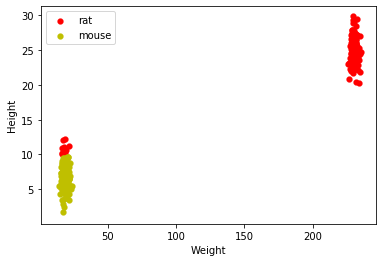

In [82]:
# 1 - Make a new scatter plot with datapoints of weights vs heights. Choose different colors for rats and mice


def plot_animals():
    animals = df["type"].unique()
    plot = plt.figure()
    ax = plot.add_subplot(111)
    colors = ['r', 'y']

    for animal, col in zip(animals, colors):
        a = df[df["type"] == animal]

        x = a["weight"]
        y = a["height"]

        ax.scatter(x,y, c=col, linewidth=0.2)

    plt.xlabel('Weight')
    plt.ylabel('Height')
    ax.legend(animals)

plot_animals()
plt.show()

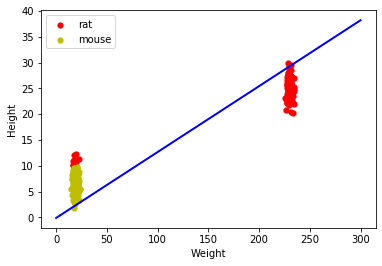

In [89]:
# 2 + 3 - Manually find the optimal linear function to divide the 2 groups (y = aX+b). Plot it on the scatter plot. (3) find slope and intercept

def find_delta(column_name):
    highest = df[column_name].max()
    lowest = df[column_name].min()

    delta = highest-lowest
    return delta, highest, lowest

# Delta
delta_x, high_x, low_x = find_delta('weight')
delta_y, high_y, low_y = find_delta('height')

slope = delta_y/delta_x
intercept = (lowest_height-grade*lowest_weight)

# Slope and intercept of the linear function: y = 0.128x-0.106

# plot
plot_animals()
l = np.linspace(0, 300)
plt.plot(l, slope * l + intercept, 'y-', lw=2, color='b')

In [95]:
# 4 - Now change the 'type' column to represent rats as 1 and mice as -1

# df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'
df.loc[df['type'] == 'rat', 'type'] = 1
df.loc[df['type'] == 'mouse', 'type'] = -1


,weight,height,type
0,233.479920,23.514130,1
1,231.324467,26.033830,1
2,17.906954,6.846577,-1
3,230.276523,24.077800,1
4,20.360593,6.605983,-1
...,...,...,...
244,20.614362,6.575722,-1
245,22.249846,6.951267,-1
246,228.568162,27.146987,1
247,229.002922,23.526073,1


In [90]:
# 5 - Clean up rows with null data
df = df.dropna()

In [ ]:
# 6 - Use these weights herè [40,-190] to determine if the following 3 animals are mice or rats
values = [[231.32446731816555,26.03382997978225],
[17.906954059999567,6.846576762459397],
[230.276522831171,24.077799766119398]]